This notebook explores the difference in alpha diversities between communities, especially across the sites.

If I'm feeling ambitious, I'll also look at stratifying the beta diversity plots by different alpha diversity levels.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
falpha = '../../data/analysis/alpha_diversity.txt'
alpha = pd.read_csv(falpha, sep='\t')
alpha.head()

,subject_id,site,mbs_consolidated,ppi_consolidated,number of full colum events/total events,Total number of reflux episodes (acid+non-acid),percent proximal total,percent distal total,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?,sample,alpha,alpha_metric
0,01-112-7,gastric_fluid,NaN,NaN,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN,01-112-7GI,5.502939,shannon
1,01-112-7,rectal_swab,NaN,NaN,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN,01-112-7RI,5.653931,shannon
2,01-112-7,throat_swab,NaN,NaN,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN,01-112-7TI,5.344570,shannon
3,01-164-7,gastric_fluid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-164-7GI,4.994163,shannon
4,01-164-7,rectal_swab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-164-7RI,5.125064,shannon


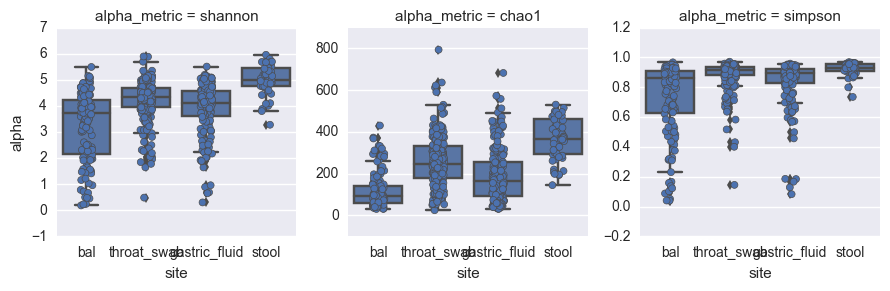

In [13]:
order = ['bal', 'throat_swab', 'gastric_fluid', 'stool']

g = sns.FacetGrid(alpha, col='alpha_metric', sharey=False)
g.map(sns.boxplot, 'site', 'alpha', order=order)
g.map(sns.stripplot, 'site', 'alpha', order=order, jitter=True, linewidth=0.5)
plt.tight_layout()

# Stratify beta diversity plots

Should stratify in two ways: by average alpha diversity and difference in alpha diversity in the samples being compared.

In [14]:
fbeta = '../../data/analysis/jsd.txt'
beta = pd.read_csv(fbeta, sep='\t')
beta.head()

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,21,22,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.399298,gastric_fluid,rectal_swab,gastric_rectalswab,within,01-112-7,2016,2016,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.991109,gastric_fluid,throat_swab,gastric_throat,within,01-112-7,2016,2016,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
2,01-112-7GI,01-164-7GI,0.991680,gastric_fluid,gastric_fluid,gastric_gastric,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-112-7GI,01-164-7RI,0.573924,gastric_fluid,rectal_swab,gastric_rectalswab,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-112-7GI,01-164-7TI,0.993451,gastric_fluid,throat_swab,gastric_throat,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
shannon = alpha.query('alpha_metric == "shannon"')
d_alpha = {i: j for i, j in zip(shannon['sample'], shannon['alpha'])}

beta['alpha_s1'] = beta['sample1'].apply(lambda x: d_alpha[x])
beta['alpha_s2'] = beta['sample2'].apply(lambda x: d_alpha[x])

showcols = ['sample1', 'sample2', 'site_comparison', 'patient_comp', 'beta', 'alpha_s1', 'alpha_s2']
beta[showcols].head()

,sample1,sample2,site_comparison,patient_comp,beta,alpha_s1,alpha_s2
0,01-112-7GI,01-112-7RI,gastric_rectalswab,within,0.399298,5.502939,5.653931
1,01-112-7GI,01-112-7TI,gastric_throat,within,0.991109,5.502939,5.344570
2,01-112-7GI,01-164-7GI,gastric_gastric,between,0.991680,5.502939,4.994163
3,01-112-7GI,01-164-7RI,gastric_rectalswab,between,0.573924,5.502939,5.125064
4,01-112-7GI,01-164-7TI,gastric_throat,between,0.993451,5.502939,4.938539


In [41]:
# Calculate average alpha diversity and difference
beta['avg_alpha'] = beta[['alpha_s1', 'alpha_s2']].mean(axis=1)
beta['diff_alpha'] = abs(beta['alpha_s1'] - beta['alpha_s2'])

showcols += ['avg_alpha', 'diff_alpha']
beta[showcols].head()

,sample1,sample2,site_comparison,patient_comp,beta,alpha_s1,alpha_s2,avg_alpha,diff_alpha
0,01-112-7GI,01-112-7RI,gastric_rectalswab,within,0.399298,5.502939,5.653931,5.578435,0.150992
1,01-112-7GI,01-112-7TI,gastric_throat,within,0.991109,5.502939,5.344570,5.423754,0.158370
2,01-112-7GI,01-164-7GI,gastric_gastric,between,0.991680,5.502939,4.994163,5.248551,0.508776
3,01-112-7GI,01-164-7RI,gastric_rectalswab,between,0.573924,5.502939,5.125064,5.314002,0.377875
4,01-112-7GI,01-164-7TI,gastric_throat,between,0.993451,5.502939,4.938539,5.220739,0.564400


# Curate the beta diversity calculations of interest

Need to:

- keep only between-patient comparisons    
- keep only within-batch comparisons    
- keep only stool-stool, bal-bal, gastric-gastric, and throat-throat comparisons   

I think that's it?

In [46]:
betaplot = beta.query('patient_comp == "between"')
betaplot = betaplot.query('((batch1 == 2014) & (batch2 == 2014)) | ((batch1 == 2016) & (batch2 == 2016))')

order_fig = ['stool_stool', 'bal_bal', 'gastric_gastric', 'throat_throat']
betaplot = betaplot.query('site_comparison == @order_fig')

betaplot['site_comparison'].unique()

array(['gastric_gastric', 'throat_throat', 'stool_stool', 'bal_bal'], dtype=object)

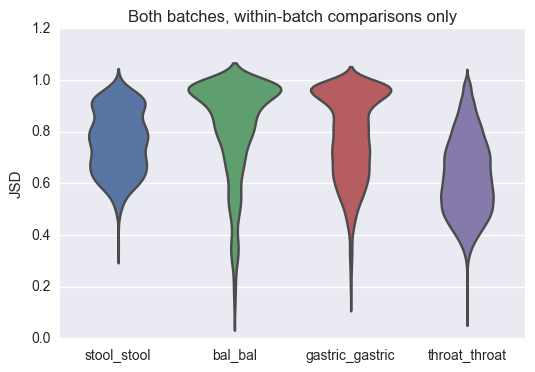

In [47]:
fig, ax = plt.subplots()
sns.violinplot(data=betaplot, x='site_comparison', y='beta', inner=None, order=order_fig)
#sns.stripplot(data=tmp2016, x='site_comparison', y='beta', order=order, jitter=True)
ax.set_title('Both batches, within-batch comparisons only')
ax.set_xlabel('')
ax.set_ylabel('JSD')

Yes, this looks exactly like the plot in my previous work/notebook

In [49]:
# Now that we've removed any comparisons we don't want,
# let's bin the alpha diversity "diference" measures 
betaplot['avg_alpha_bins'] = pd.cut(betaplot['avg_alpha'], 5)
betaplot['diff_alpha_bins'] = pd.cut(betaplot['diff_alpha'], 5)

showcols += ['avg_alpha_bins', 'diff_alpha_bins']
betaplot[showcols].head()

,sample1,sample2,site_comparison,patient_comp,beta,alpha_s1,alpha_s2,avg_alpha,diff_alpha,avg_alpha_bins,diff_alpha_bins,avg_alpha_bins,diff_alpha_bins
2,01-112-7GI,01-164-7GI,gastric_gastric,between,0.991680,5.502939,4.994163,5.248551,0.508776,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]"
6,01-112-7GI,01-173-4G,gastric_gastric,between,0.990885,5.502939,4.602368,5.052654,0.900571,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]"
13,01-112-7GI,01-209-2G,gastric_gastric,between,0.987338,5.502939,4.987354,5.245147,0.515585,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]"
15,01-112-7GI,01-215-7G,gastric_gastric,between,0.991582,5.502939,5.137828,5.320384,0.365111,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]"
17,01-112-7GI,01-230-9GF,gastric_gastric,between,0.693776,5.502939,4.854512,5.178725,0.648428,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]"


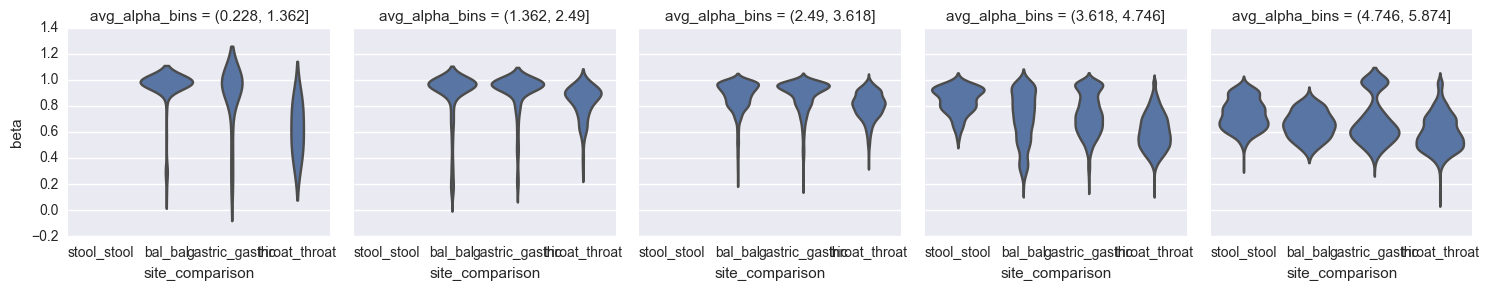

In [50]:
# Make the same JSD plot as above, faceted by alpha diversity
g = sns.FacetGrid(betaplot, col='avg_alpha_bins')
g.map(sns.violinplot, 'site_comparison', 'beta', 
      inner=None, order=order_fig)

From left to right is increasing average alpha diversity.

For BAL, it looks like communities tend to get more similar as their average alpha diversity increases. So a lot of the difference between BAL communities can be explained by samples with different alpha diversities.

For gastric-gastric, though, even at the highest average alpha diversity, you still see many very different samples (i.e. JSD close to 1). This supports the idea that gastric samples tend to be very different.

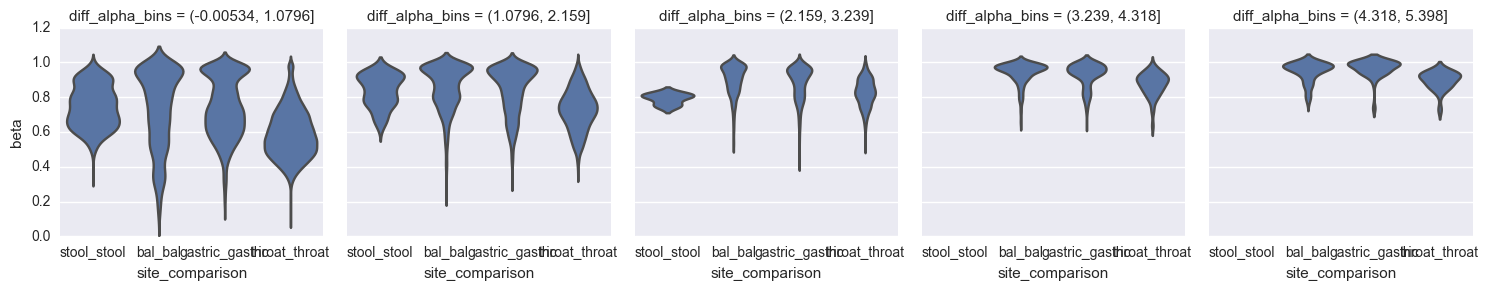

In [51]:
g = sns.FacetGrid(betaplot, col='diff_alpha_bins')
g.map(sns.violinplot, 'site_comparison', 'beta', 
      inner=None, order=order_fig)


From left to right is increasing difference in alpha diversity. i.e. left-most plot has beta diversities between samples with similar alpha diversities. right-most plot has beta diversities between samples with very different alpha diversities.

The two plots on the right make lots of sense: if the alpha diversity of two samples is very different, you also expect their beta diversity calculation to be different. The left two plots are interesting: even in BAL and gastric communities that have very similar alpha diversities, you still see that many of the JSD's are close to 1. 

These might be comparisons between two low-alpha diversity samples... oh, let's facet on both types to see!

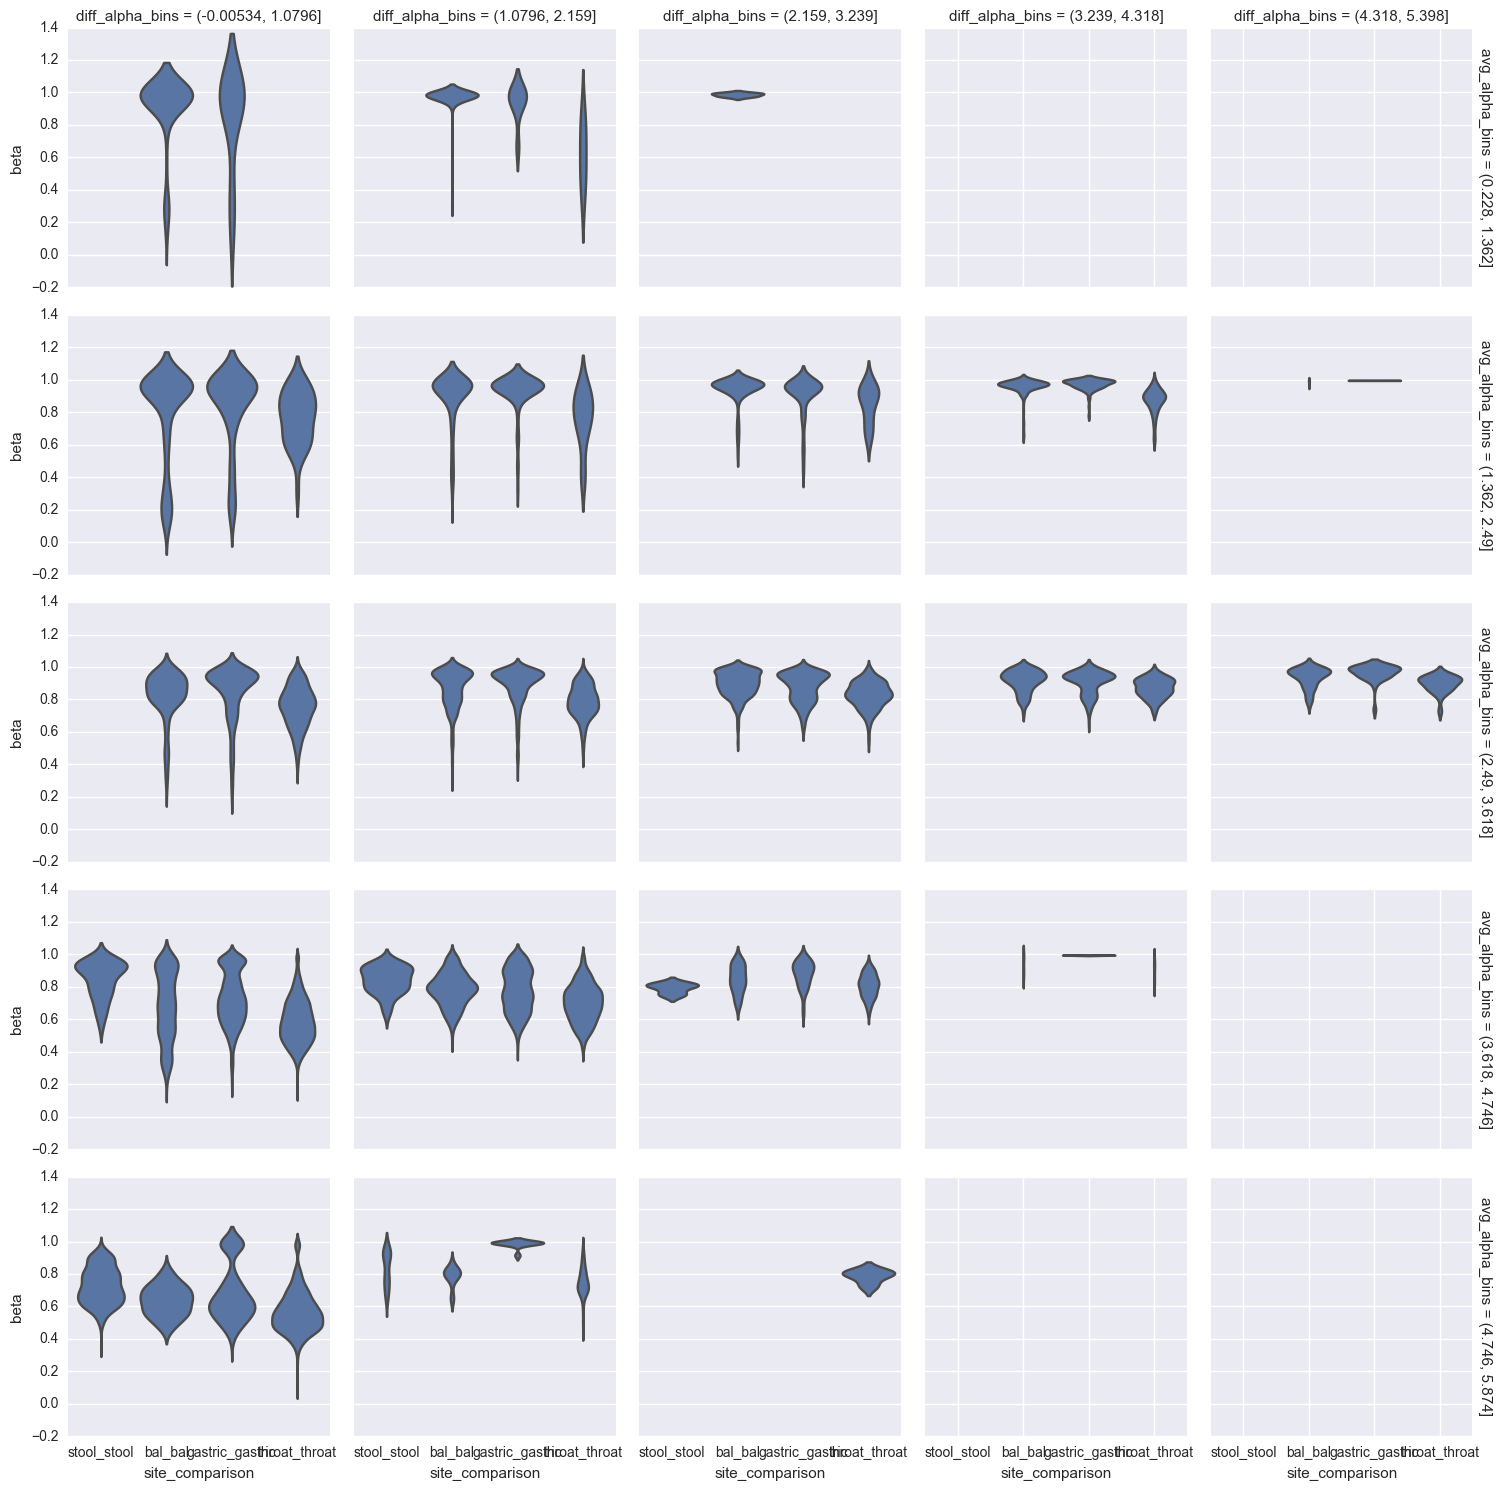

In [55]:
plt.figure(figsize=(8 ,8))
g = sns.FacetGrid(betaplot, col='diff_alpha_bins', row='avg_alpha_bins', margin_titles=True)
g.map(sns.violinplot, 'site_comparison', 'beta', 
      inner=None, order=order_fig)


Top to bottom: increasing average alpha diversity.   
Left to right: increasing difference in alpha diversity.   

Top left: comparisons between samples which both have low alpha diversities.    
Bottom right: comparisons between samples with similarly high alpha diversities.    

Left column, top to bottom: these are all comparisons between samples with very similar alpha diversities. As the alpha diversity increases, bal-bal comparisons get more similar but gastric-gastric comparisons still stay bi-modal! So there are some gastric samples with similarly high alpha diversities that are nevertheless quite different.


### Re-make plot, but bin into quantiles rather than equal-width bins

In [56]:
betaplot['avg_alpha_qbins'] = pd.qcut(betaplot['avg_alpha'], 5)
betaplot['diff_alpha_qbins'] = pd.qcut(betaplot['diff_alpha'], 5)

showcols += ['avg_alpha_qbins', 'diff_alpha_qbins']
betaplot[showcols].head()

,sample1,sample2,site_comparison,patient_comp,beta,alpha_s1,alpha_s2,avg_alpha,diff_alpha,avg_alpha_bins,diff_alpha_bins,avg_alpha_bins,diff_alpha_bins,avg_alpha_qbins,diff_alpha_qbins
2,01-112-7GI,01-164-7GI,gastric_gastric,between,0.991680,5.502939,4.994163,5.248551,0.508776,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]","(4.545, 5.874]","(0.492, 0.856]"
6,01-112-7GI,01-173-4G,gastric_gastric,between,0.990885,5.502939,4.602368,5.052654,0.900571,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]","(4.545, 5.874]","(0.856, 1.584]"
13,01-112-7GI,01-209-2G,gastric_gastric,between,0.987338,5.502939,4.987354,5.245147,0.515585,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]","(4.545, 5.874]","(0.492, 0.856]"
15,01-112-7GI,01-215-7G,gastric_gastric,between,0.991582,5.502939,5.137828,5.320384,0.365111,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]","(4.545, 5.874]","(0.233, 0.492]"
17,01-112-7GI,01-230-9GF,gastric_gastric,between,0.693776,5.502939,4.854512,5.178725,0.648428,"(4.746, 5.874]","(-0.00534, 1.0796]","(4.746, 5.874]","(-0.00534, 1.0796]","(4.545, 5.874]","(0.492, 0.856]"


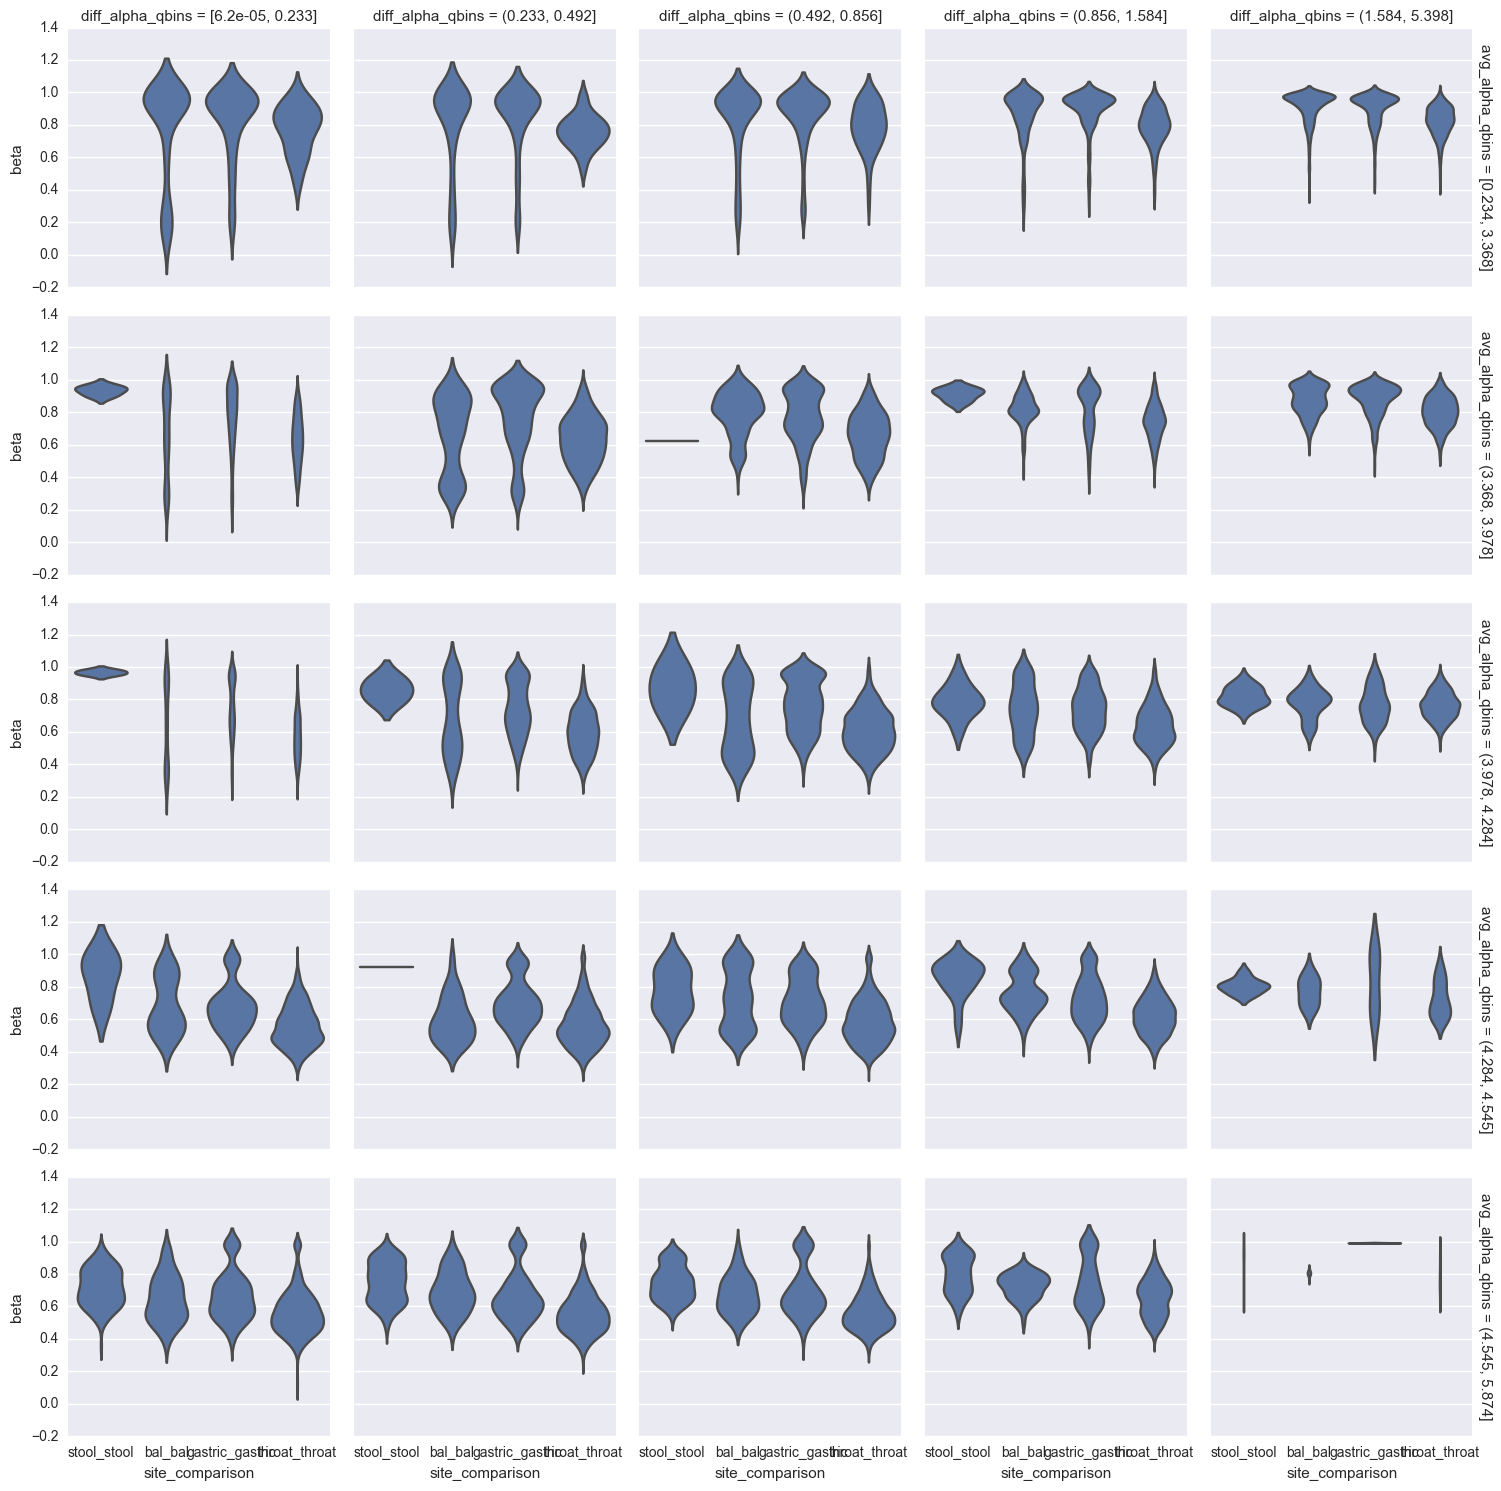

In [57]:
plt.figure(figsize=(8 ,8))
g = sns.FacetGrid(betaplot, col='diff_alpha_qbins', row='avg_alpha_qbins', margin_titles=True)
g.map(sns.violinplot, 'site_comparison', 'beta', 
      inner=None, order=order_fig)


Hm, this one is harder to interpret. Looks like the patterns are basically the same though?
